<a href="https://colab.research.google.com/github/SantiagoMorenoV/Position-vs-Salaries/blob/main/R/Pos_Salaries_SVR_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Did the interviewee tell the truth?**

An HR recruiter wants to know if a candidate told the truth or not about his salary in his previous position.

For this case, I have a dataset with the positions and salaries from the company where the candidate used to work.

# **Importing the dataset**

In [28]:
dataset = read.csv('https://raw.githubusercontent.com/SantiagoMorenoV/Position-vs-Salaries/main/Position_Salaries.csv')
dataset
dataset = dataset[2:3]
dataset

Position,Level,Salary
<chr>,<int>,<int>
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000


Level,Salary
<int>,<int>
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000


With dataset = dataset[2:3], I keep the second and third columns, which are the columns that I will use in the model.

# **Plotting Data to see if it is linear or maybe it is more like a polynomial**

There are two ways of plotting Salary vs Position. With the library ggplot and by using the R's function "plot()" to create a scatter plot.

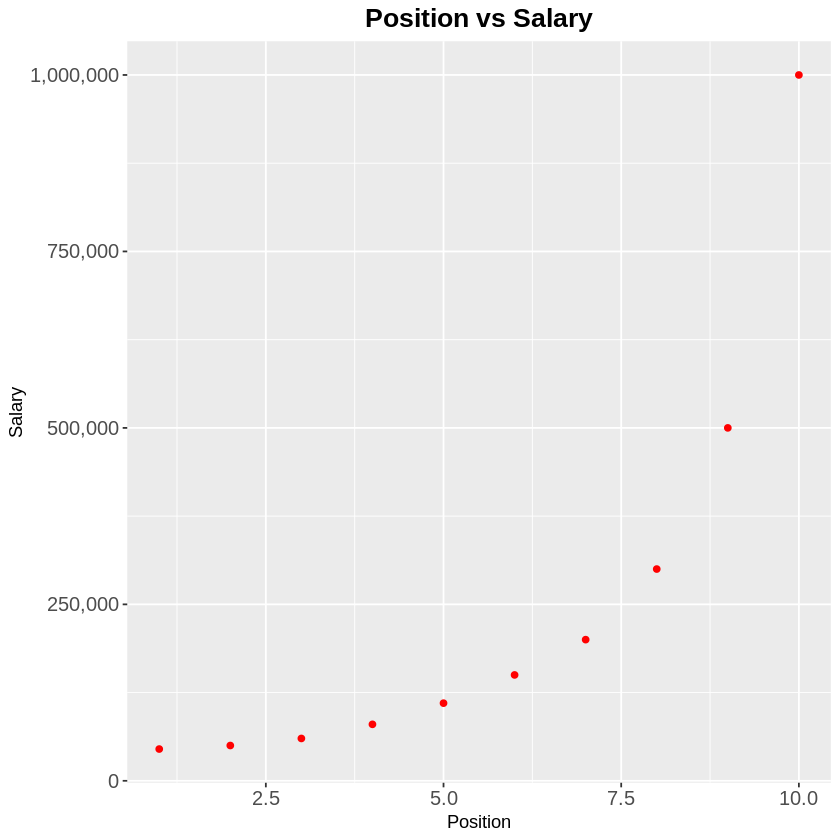

In [29]:
library(ggplot2)
library(scales)
ggplot(data = dataset, aes(x = Level, y = Salary)) +
  geom_point(color = "red") +
  labs(x = "Position", y = "Salary", title = "Position vs Salary") +
  theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12)) +
  scale_y_continuous(labels = comma)

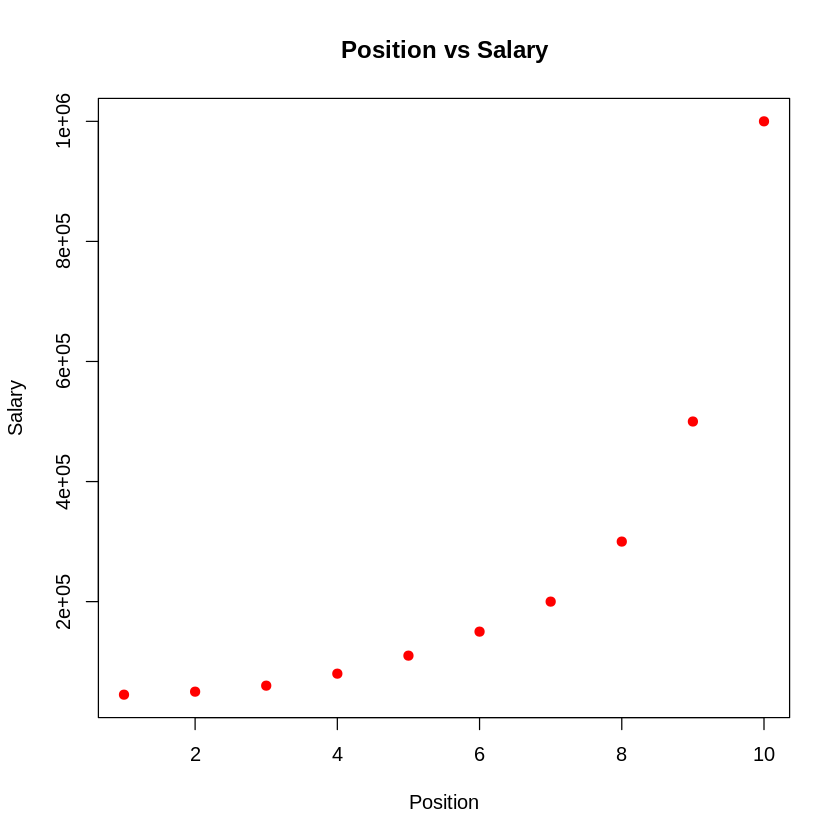

In [30]:
plot(dataset$Level, dataset$Salary, col = "red", pch = 19,
     xlab = "Position", ylab = "Salary", main = "Position vs Salary")

# **Descriptive Statistics**

In [31]:
summary(dataset)

     Level           Salary       
 Min.   : 1.00   Min.   :  45000  
 1st Qu.: 3.25   1st Qu.:  65000  
 Median : 5.50   Median : 130000  
 Mean   : 5.50   Mean   : 249500  
 3rd Qu.: 7.75   3rd Qu.: 275000  
 Max.   :10.00   Max.   :1000000  

# **Salary distribution**

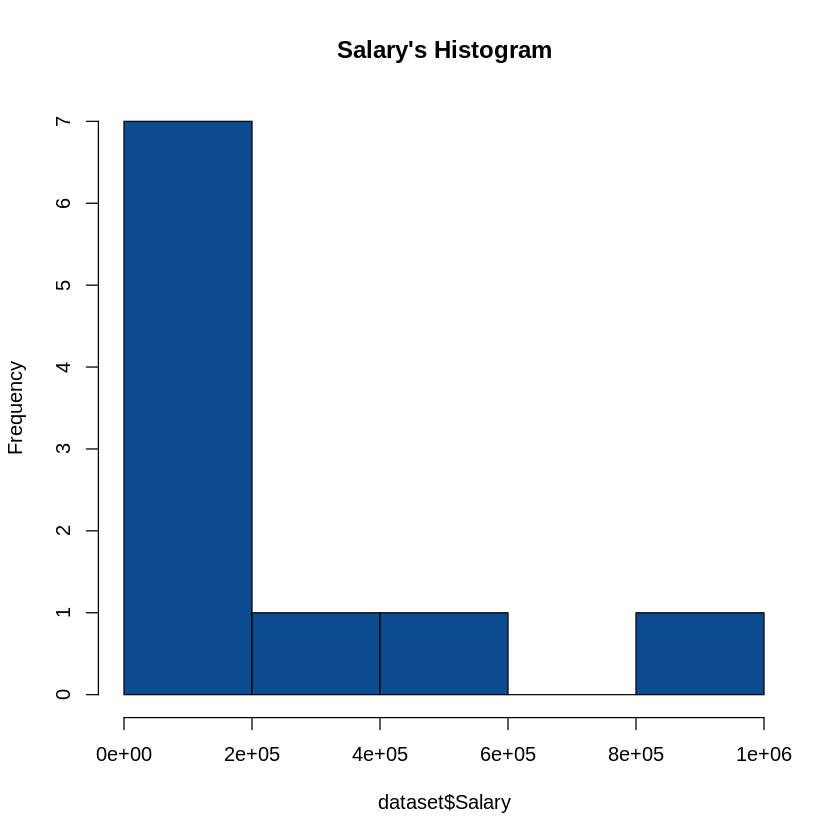

In [32]:
hist(dataset$Salary, main ="Salary's Histogram", col= '#0E4C92')

# **Boxplot**

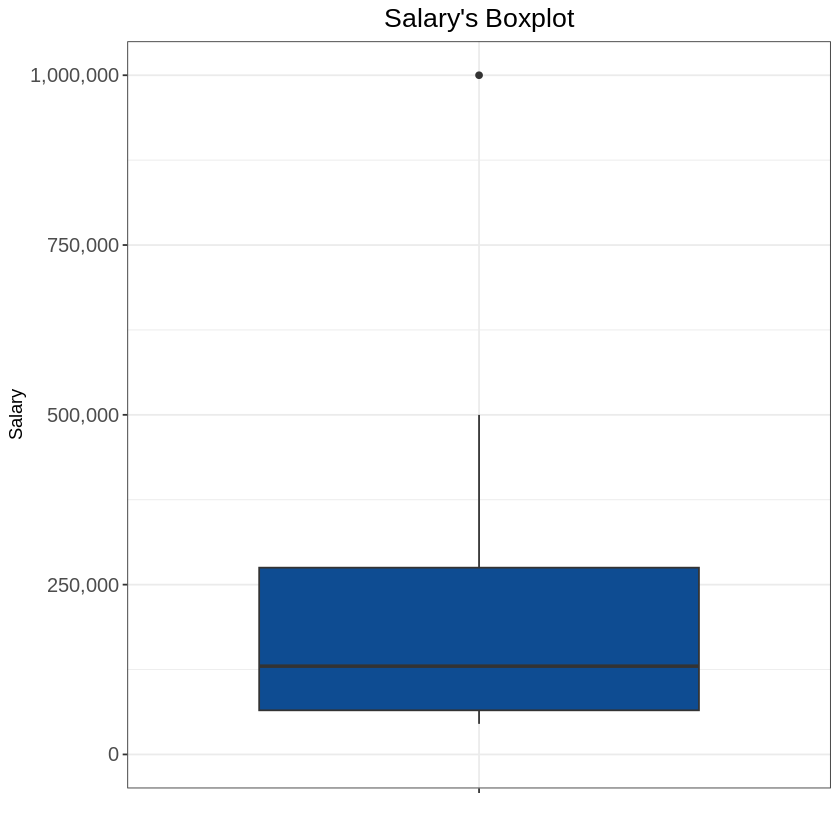

In [33]:
#install.packages("ggplot2")
library(ggplot2)
library(scales)
variables <- c("Salary")
for (var in variables) {
  print(ggplot(data = dataset, aes(x = "", y = dataset[,var])) +
    geom_boxplot(fill = "#0E4C92") +
    labs(x = "", y = var, title = paste0(var, "'s Boxplot")) +
    scale_y_continuous(labels = comma, limits = c(0, max(dataset[,var]))) +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 16),
          axis.text.y = element_text(size = 12)))
}

# **Fitting the Support Vector Regression on the whole dataset**

In [34]:
#install.packages('e1071')
library(e1071)
regressor = svm(formula = Salary ~ .,
                data = dataset,
                type = 'eps-regression',
                kernel = 'radial')
print(regressor)


Call:
svm(formula = Salary ~ ., data = dataset, type = "eps-regression", 
    kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 
    epsilon:  0.1 


Number of Support Vectors:  6



# **Predicting the salary**

In [35]:
y_pred = predict(regressor, data.frame(Level = 6.5))
y_pred

1 
177861.1

# **Visualising the SVR results**

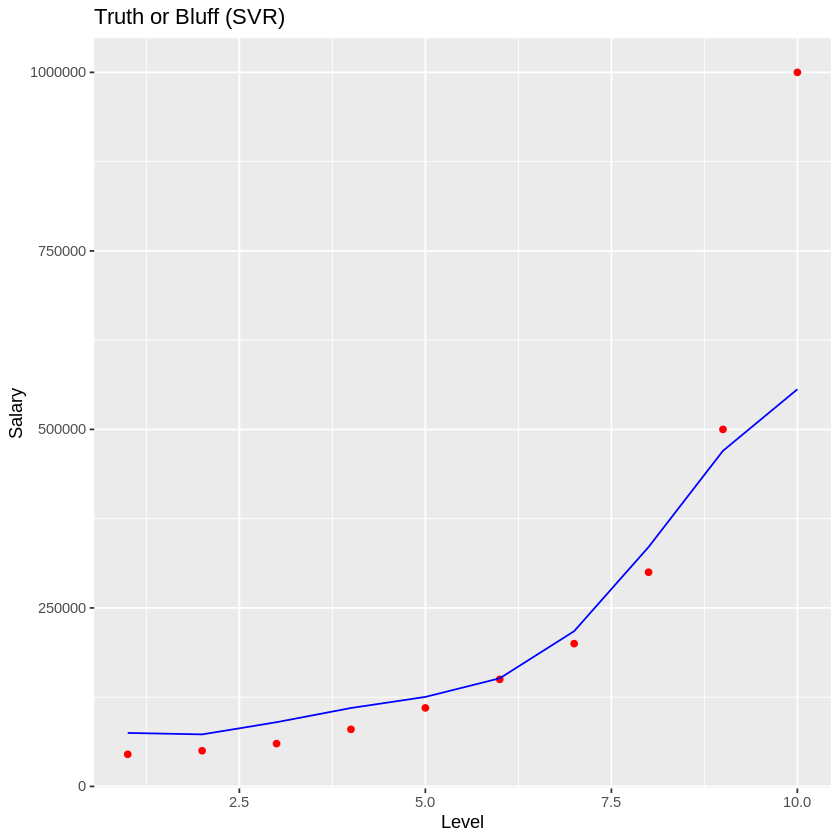

In [36]:
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(regressor, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (SVR)') +
  xlab('Level') +
  ylab('Salary')

# **Visualising the SVR results (for higher resolution and smoother curve)**

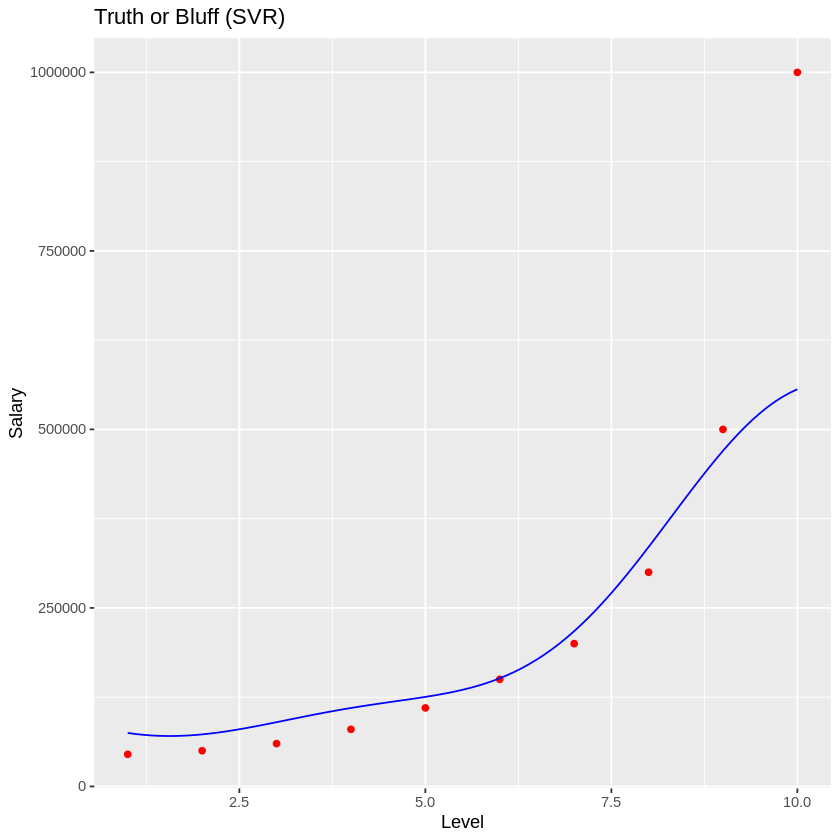

In [37]:
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (SVR)') +
  xlab('Level') +
  ylab('Salary')

# **Discussion**

Once evaluated that the previous position of the candidate was Regional Manager, he had been working in that role for two years, and also that, once gotten data from the previous company, it was possible to classify him as an intermediate-level in the 6-7 range or between Regional Manager and Partner. In other words, a 6.5 position level.

The SVR model predicted this candidate's salary of USD 177,861.11, close and a little more than his answer, USD 160K per year. In conclusion, the statistical evidence showed that he might be telling the truth.

There is a Polynomial regression with a closer prediction in another file of this project repository.